In [2]:
import numpy as np
import scipy.spatial.distance as distance
from matplotlib import pylab
from sklearn.manifold import TSNE

%matplotlib inline

In [3]:
data = np.load('embeddings_skipgram.npy')

In [4]:
embeddings = data[()]['embeddings']
idx_to_game = data[()]['idx_to_game']
game_to_idx = data[()]['game_to_idx']

In [5]:
def closest(u, count=8):
    closest = []
    for idx, game in enumerate(idx_to_game):
        closest.append((idx, distance.cosine(u, embeddings[idx])))

    return [(idx_to_game[x[0]], x[1]) for x in sorted(closest, key=lambda t: t[1])][:count]

def closest_to_game(game, count=8):
    return closest(embeddings[game_to_idx[game]], count)

def game_distance(a, b):
    return distance.cosine(embeddings[game_to_idx[a]], embeddings[game_to_idx[b]])

In [6]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, metric='cosine')
two_d_embeddings = tsne.fit_transform(embeddings[1:num_points+1, :])

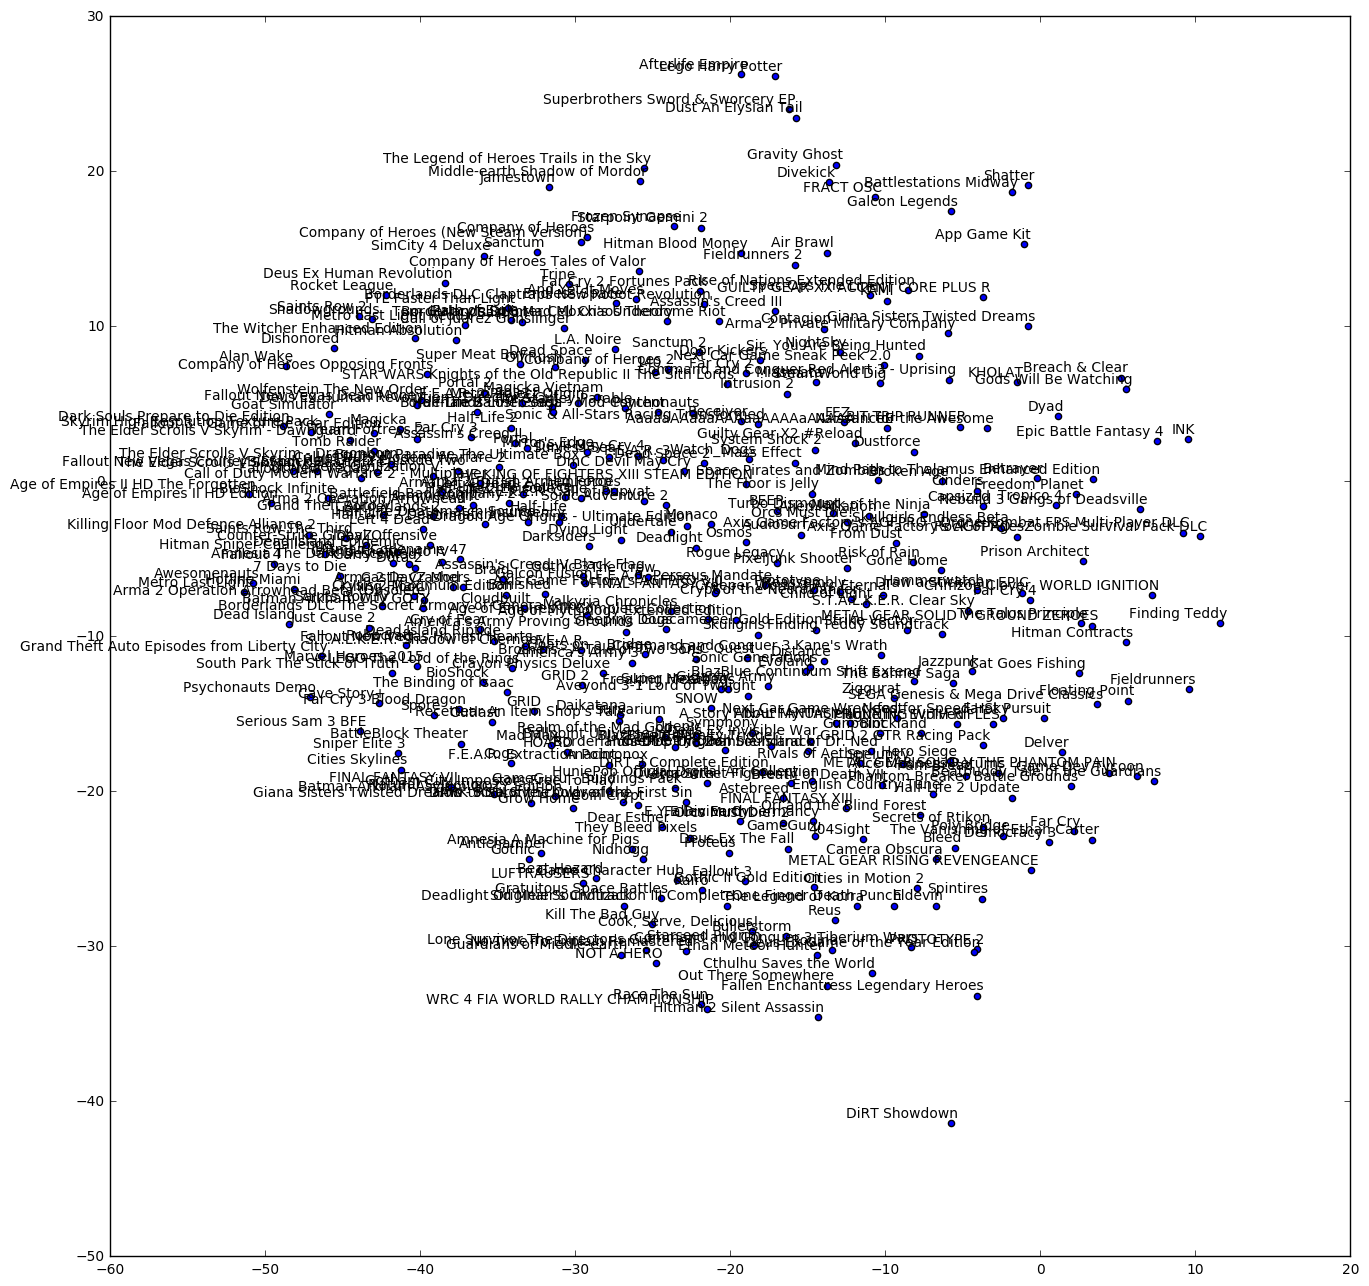

In [7]:
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(16, 16))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i, :]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  pylab.show()

words = [idx_to_game[i] for i in range(1, num_points + 1)]
plot(two_d_embeddings, words)

In [8]:
print('Cosine: {}'.format(distance.cosine(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Euclidean: {}'.format(distance.euclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Squared eucliedean: {}'.format(distance.sqeuclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))
print('Correlation: {}'.format(distance.correlation(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Portal']])))

Cosine: 0.2697375142261429
Euclidean: 0.7344895601272583
Squared eucliedean: 0.5394749045372009
Correlation: 0.2724293823786751


In [9]:
print('Cosine: {}'.format(distance.cosine(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Euclidean: {}'.format(distance.euclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Squared eucliedean: {}'.format(distance.sqeuclidean(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))
print('Correlation: {}'.format(distance.correlation(embeddings[game_to_idx['Portal 2']], embeddings[game_to_idx['Dota 2']])))

Cosine: 0.30872442178275716
Euclidean: 0.7857791781425476
Squared eucliedean: 0.6174488663673401
Correlation: 0.309666745863149


In [10]:
closest_to_game('Counter-Strike Global Offensive', 8)

[('Counter-Strike Global Offensive', 1.1920928955078125e-07),
 ('Dota 2', 0.17263484001159668),
 ('Unturned', 0.19222376439288091),
 ('Left 4 Dead 2', 0.20029914379119873),
 ('Team Fortress 2', 0.2309051293674188),
 ('Warframe', 0.23638124682791517),
 ('PlanetSide 2', 0.25184249877929688),
 ("Sid Meier's Civilization V", 0.25332391262054443)]

In [11]:
game_distance('Grand Theft Auto V', 'Hotline Miami')

0.70876906305097442

In [12]:
closest(embeddings[game_to_idx['Team Fortress 2']] - embeddings[game_to_idx['Counter-Strike']], 16)

[('Team Fortress 2', 0.61107307665300992),
 ('Narco Terror', 0.71648035692269119),
 ('Rise of Flight United', 0.7186856835604547),
 ('Robin Hood', 0.7327273550231892),
 ('Turbo Dismount', 0.73284337483633422),
 ('Bloodsports.TV - Blood Brawl', 0.73554944012059265),
 ('ARK Survival Evolved', 0.73868302690046406),
 ('3SwitcheD', 0.74066734195535844),
 ('Toy Soldiers War Chest', 0.75041564430211571),
 ('Pro Evolution Soccer 2013 DP DLC', 0.75739110088633743),
 ('Great Permutator', 0.75931438730284984),
 ('Terraria', 0.7594137869389338),
 ('Adventure Park', 0.76011695510750354),
 ('Anomaly Warzone Earth', 0.76121226715302814),
 ('Rise of Incarnates', 0.76530407032953696),
 ('Survarium', 0.76752158596898745)]

In [13]:
closest(embeddings[game_to_idx['Counter-Strike']] - embeddings[game_to_idx['Team Fortress 2']], 16)

[('Counter-Strike', 0.6110731149665396),
 ('Higurashi When They Cry - Ch.1 Onikakushi', 0.65755162558163038),
 ('Ricochet', 0.66831657486873208),
 ('Deathmatch Classic', 0.6958958970886393),
 ('Day of Defeat', 0.72807585020973975),
 ('Half-Life Opposing Force', 0.73175125090538273),
 ('Team Fortress Classic', 0.73210407701141611),
 ('Counter-Strike Condition Zero Deleted Scenes', 0.74341154063035475),
 ('Cat Goes Fishing', 0.7443747504352608),
 ('RPG Maker High Fantasy Main Party Pack 1', 0.75023072406206759),
 ('Amnesia Memories', 0.75937531052858431),
 ('Ironclad Tactics', 0.76423874354311705),
 ('Carmageddon 2 Carpocalypse Now', 0.76445305537576091),
 ('Tradewinds Caravans', 0.7652738217996462),
 ('Red Orchestra Ostfront 41-45', 0.76626503977390481),
 ('The Incredible Adventures of Van Helsing III', 0.77148471278762254)]

In [14]:
closest(embeddings[game_to_idx['Dota 2']] - embeddings[game_to_idx['Counter-Strike']], 8)

[('Dota 2', 0.60491257062627402),
 ('Reversion - The Meeting', 0.67634095347421708),
 ('Narco Terror', 0.68838795546087628),
 ('Unturned', 0.70066536322652251),
 ('The 11th Hour', 0.70167097253579591),
 ('ARK Survival Evolved', 0.72880934566369027),
 ('Heroes & Generals', 0.73258275558294095),
 ('Magic Duels', 0.73600624247138979)]

In [17]:
closest_to_game('Football Manager 2016', 16)

[('Football Manager 2016', 0.0),
 ('Football Manager 2015', 0.48257797956466675),
 ('Volume', 0.48295933211334563),
 ('Football Manager 2012', 0.49324166774749756),
 ('Myst Masterpiece Edition', 0.49910899991446733),
 ('Game of Thrones - A Telltale Games Series', 0.50595170259475708),
 ('Tiamat X', 0.5096090424526879),
 ("D4 Dark Dreams Don't Die", 0.51652887266530123),
 ('James Bond Blood Stone', 0.52807697821122279),
 ("America's Army Proving Grounds", 0.53305721282958984),
 ('Nancy Drew Ghost Dogs of Moon Lake ', 0.53515622019767761),
 ('Ironclads American Civil War', 0.53563278488722021),
 ('Euro Truck Simulator 2 - Ice Cold Paint Jobs Pack', 0.53613027930259705),
 ('Postal 3', 0.53681665658950806),
 ('Europa Universalis Rome - Vae Victis', 0.54298093914985657),
 ('Coldfire Keep', 0.54335647304576962)]